# 1.1 Import Packages

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Text column creation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

# Modeling
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import loguniform
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

RANDOM_STATE = 283

# 2.1 Setup - Import Data

In [2]:
# Read csv with count vectorized subreddit data into dataframe
df_vector = pd.read_csv('./data/subreddits_count.csv')
# Read csv with TF-IDF vectorized subreddit data into dataframe
df_tfvector = pd.read_csv('./data/subreddits_tfidf.csv')

# 2.2 Setup - Define Baseline Accuracy

In [3]:
# Display proportion of posts by subreddit
df_vector['post_subreddit'].value_counts(normalize = True)

nfl         0.504844
patriots    0.495156
Name: post_subreddit, dtype: float64

In [4]:
# Create baseline accuracy
baseline_acc = df_vector['post_subreddit'].value_counts(normalize = True)[0]

> Models have a low bar for baseline accuracy, needing to only beat an accuracy of 0.54 to be better than simply predicting the majority class.

# 2.3 Setup - Define and Split Datasets

In [5]:
# Create count vectorized data set

# Set X equal to the combined text column for
X_cv = df_vector.drop(columns = ['post_subreddit','post_id','created_utc'])

# Set y equal to the subreddit
y_cv = df_vector['post_subreddit']

# Train-test split the data
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_cv, y_cv, random_state = RANDOM_STATE)

In [6]:
# Create TF-IDF vectorized data set

# Set X equal to the combined text column for
X_tf = df_vector.drop(columns = ['post_subreddit','post_id','created_utc'])

# Set y equal to the subreddit
y_tf = df_vector['post_subreddit']

# Train-test split the data
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, random_state = RANDOM_STATE)

# 2.4 Setup - Data Visualizations

In [162]:
# Create a function to print the cross-validation score and parameters for the best model from a gridsearch
def grid_best(grid, X_train, X_test, y_train, y_test, title):
    print(f"Best model's cross-validation score: {round(grid.best_score_,5)}")
    print(f"""Best model's parameters:
              {grid.best_params_}
          """)
    print(f"""Best model's accuracy scores:
              Training data: {round(grid.score(X_train,y_train),5)}
              Testing data: {round(grid.score(X_test,y_test),5)}
          """)
    plot_confusion_matrix(grid, X_test, y_test, cmap='Blues', values_format='d')
    plt.title(title, size = 16)

# 3.1 Logistic Regression - Count Vectorized 

In [32]:
# Instantiate a pipeline with max absolute scaler (to allow for regularization) and logistict regression
pipe_lrcv = Pipeline([
    ('maxabs', MaxAbsScaler()),
    ('logreg', LogisticRegression())
])

# Define logistict regression parameters, allowing for both LASSO and Ridge regularization or no regularization
params_logreg = {
    'logreg__penalty': ['l2','l1',None],
    'logreg__C': [0.01,0.1,1,10,100,1000],
    'logreg__solver': ['lbfgs','liblinear']
}

# Instantiate grid search with pipeline of max absolute scaler and logistic regression
grid_lrcv = GridSearchCV(pipe_lrcv,
                         params_logreg,
                         verbose = True,
                         cv = 5
                         )

# Fit the grid search to the training data
grid_lrcv.fit(X_cv_train, y_cv_train)

# NOTE: FitFailedWarning will indicate that l1 regularization cannot use lbfgs solver

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], go

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], go

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], go

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   32.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('maxabs', MaxAbsScaler(copy=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                

Best model's cross-validation score: 0.87687
Best model's parameters:
              {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
          
Best model's accuracy scores:
              Training data: 0.99728
              Testing data: 0.89409
          


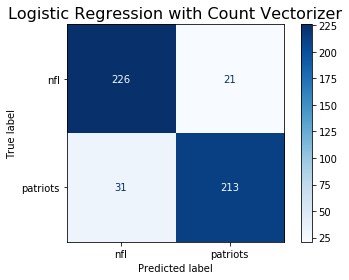

In [164]:
# Print the parameters and accuracy metrics of the best model
grid_best(grid_lrcv, X_cv_train, X_cv_test, y_cv_train, y_cv_test, 'Logistic Regression with Count Vectorizer')

In [175]:
# Extract coefficients from the best model
grid_lrcv_coefs = grid_lrcv.best_estimator_.named_steps['logreg'].coef_

# Create dataframe of coefficients by joining column names and transposing
df_lrcv_coefs = pd.DataFrame(grid_lrcv_coefs, columns = X_cv_train.columns, index = ['coefficients']).T

# Add columns of coefficient absolute values and odds (exponentiate log odds)
df_lrcv_coefs['abs_coef'] = abs(df_lrcv_coefs['coefficients'])

# Display top 15 coefficients
top25_lrcv = df_lrcv_coefs.sort_values('abs_coef', ascending = False).head(25)
top25_lrcv

,coefficients,abs_coef
patriots,87.990745,87.990745
comms_num,-68.711438,68.711438
cam,38.894361,38.894361
highlight,-35.550281,35.550281
nfl,-33.296724,33.296724
newton,22.994873,22.994873
stidham,17.006728,17.006728
england,11.953243,11.953243
edelman,10.707586,10.707586
hightower,10.098629,10.098629


# 3.2 Logistic Regression - TF-IDF Vectorized 

In [41]:
# Instantiate a pipeline with max absolute scaler (to allow for regularization) and logistict regression
pipe_lrtf = Pipeline([
    ('maxabs', MaxAbsScaler()),
    ('logreg', LogisticRegression(max_iter = 200))
])

# Instantiate grid search with pipeline of max absolute scaler and logistic regression
grid_lrtf = GridSearchCV(pipe_lrtf,
                         params_logreg,
                         verbose = True,
                         cv = 5
                         )

# Fit the grid search to the training data
grid_lrtf.fit(X_tf_train, y_tf_train)

# NOTE: FitFailedWarning will indicate that l1 regularization cannot use lbfgs solver

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], go

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], go

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/opt/anaconda3/lib/

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('maxabs', MaxAbsScaler(copy=True)),
                                       ('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=200,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                

Best model's cross-validation score: 0.87755
Best model's parameters:
              {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
          
Best model's accuracy scores:
              Training data: 0.99728
              Testing data: 0.89409
          


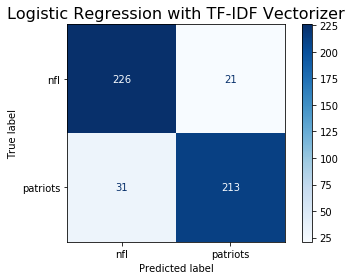

In [165]:
# Print the parameters and accuracy metrics of the best model
grid_best(grid_lrtf, X_tf_train, X_tf_test, y_tf_train, y_tf_test, 'Logistic Regression with TF-IDF Vectorizer')

In [174]:
# Extract coefficients from the best model
grid_lrtf_coefs = grid_lrtf.best_estimator_.named_steps['logreg'].coef_

# Create dataframe of coefficients by joining column names and transposing
df_lrtf_coefs = pd.DataFrame(grid_lrtf_coefs, columns = X_tf_train.columns, index = ['coefficients']).T

# Add column of coefficient absolute values
df_lrtf_coefs['abs_coef'] = abs(df_lrtf_coefs['coefficients'])

# Display top 15 coefficients
top25_lrtf = df_lrtf_coefs.sort_values('abs_coef', ascending = False).head(25)
top25_lrtf

,coefficients,abs_coef
patriots,87.657792,87.657792
comms_num,-69.150432,69.150432
cam,38.965119,38.965119
highlight,-35.799708,35.799708
nfl,-33.484064,33.484064
newton,23.014491,23.014491
stidham,16.887489,16.887489
england,11.951612,11.951612
edelman,10.715858,10.715858
hightower,10.105837,10.105837


# 3.3 Logistic Regression - Summary 

As might be expected, in both logistic regression models the best indicators of whether a post came from r/nfl or r/patriots came from the words "patriots" itself as well as several of the most notable players on the team. Additionally, a higher number of comments indicated significantly greater likelihood of being from r/nfl, which also makes sense given that sub has more than 1.9 million members compared to around 0.5 million for r/patriots.

Somewhat lower down in the rankings, several strong indicators toward r/nfl appeared to highlight the differences in how the two subreddits are used. Terms such as "highlight", "oc" (original content), "analyzing", and "today" illustrated the focus in r/nfl on news and content over commentary and discussion that tends to be the focus on team-specific subreddits.

Some other teams and opposing players made their way toward the top of the rankings, though these include teams/players with limited or dormant rivalries who do not play the team in 2020.

# 4.1 Random Forest - Count Vectorized 

In [51]:
# Define random forest parameters
params_rf = {
    'max_depth': [4, 5, None],
    'max_features': ['auto', 0.5],
    'n_estimators': [100, 125, 150],
    'min_samples_split': [2,4]
}

# Instantiate grid search with random forest classifier
grid_rfcv = GridSearchCV(RandomForestClassifier(random_state = RANDOM_STATE),
                         params_rf,
                         verbose = True,
                         cv = 5
                         )

# Fit the grid search to the training data
grid_rfcv.fit(X_cv_train, y_cv_train)

# NOTE: FitFailedWarning will indicate that l1 regularization cannot use lbfgs solver

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  9.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=283,
                                 

Best model's cross-validation score: 0.91701
Best model's parameters:
              {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 125}
          
Best model's accuracy scores:
              Training data: 1.0
              Testing data: 0.89817
          


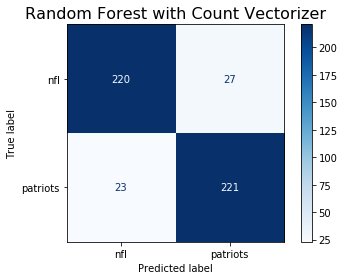

In [167]:
# Print the parameters and accuracy metrics of the best model
grid_best(grid_rfcv, X_cv_train, X_cv_test, y_cv_train, y_cv_test, 'Random Forest with Count Vectorizer')

In [173]:
# Extract feature importance from the best model
grid_rfcv_featimp = grid_rfcv.best_estimator_.feature_importances_

# Create dataframe of feature importances by joining column names and transposing
df_rfcv_featimp = pd.DataFrame(grid_rfcv_featimp, index = X_cv_train.columns, columns = ['feature_importance'])

# Display top 15 coefficients
top25_rfcv = df_rfcv_featimp.sort_values('feature_importance', ascending = False).head(25)
top25_rfcv

,feature_importance
link_i.redd.it,0.057378
comms_num,0.057275
patriots,0.045296
post_score,0.035466
cam,0.033551
link_twitter.com,0.025599
nfl,0.019792
newton,0.018123
highlight,0.013633
posting_hour_utc,0.012450


# 4.2 Random Forest - TF-IDF Vectorized 

In [49]:
# Instantiate grid search with random forest classifier
grid_rftf = GridSearchCV(RandomForestClassifier(random_state = RANDOM_STATE),
                         params_rf,
                         verbose = True,
                         cv = 5
                         )

# Fit the grid search to the training data
grid_rftf.fit(X_tf_train, y_tf_train)

# NOTE: FitFailedWarning will indicate that l1 regularization cannot use lbfgs solver

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=283,
                                 

Best model's cross-validation score: 0.91701
Best model's parameters:
              {'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}
          
Best model's accuracy scores:
              Training data: 1.0
              Testing data: 0.89817
          


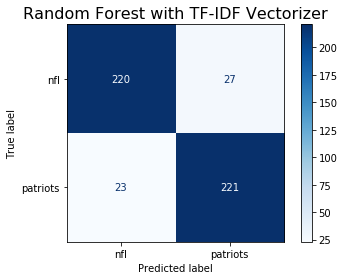

In [168]:
# Print the parameters and accuracy metrics of the best model
grid_best(grid_rftf, X_tf_train, X_tf_test, y_tf_train, y_tf_test, 'Random Forest with TF-IDF Vectorizer')

In [172]:
# Extract feature importance from the best model
grid_rftf_featimp = grid_rftf.best_estimator_.feature_importances_

# Create dataframe of feature importances by joining column names and transposing
df_rftf_featimp = pd.DataFrame(grid_rftf_featimp, index = X_tf_train.columns, columns = ['feature_importance'])

# Display top 15 coefficients
top25_rftf = df_rftf_featimp.sort_values('feature_importance', ascending = False).head(25)
top25_rftf

,feature_importance
link_i.redd.it,0.057378
comms_num,0.057275
patriots,0.045296
post_score,0.035466
cam,0.033551
link_twitter.com,0.025599
nfl,0.019792
newton,0.018123
highlight,0.013633
posting_hour_utc,0.012450


# 4.3 Random Forest - Summary 

While many of the most important terms remain very familiar from the logistic regressions, these models both appear to make significantly more use of the link dummy variables. While "link_i.reddit" had appeared on the list of the top 25 coefficients from the logistic regression

# 5.1 Support Vector - Count Vectorized

In [110]:
# Instantiate a pipeline with max absolute scaler (to allow for regularization) and logistict regression
pipe_svccv = Pipeline([
    ('maxabs', MaxAbsScaler()),
    ('svc', SVC())
])

# Define logistict regression parameters, allowing for both LASSO and Ridge regularization or no regularization
params_svccv = {
    'svc__C': np.linspace(0.0001,10,5),
    'svc__gamma': ['auto','scale']
}

# Instantiate grid search with pipeline of max absolute scaler and logistic regression
grid_svccv = GridSearchCV(pipe_svc,
                        params_svc,
                        verbose = True,
                        cv = 5
                        )

# Fit the grid search to the training data
grid_svc.fit(X_cv_train, y_cv_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('maxabs', MaxAbsScaler(copy=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'svc__C': array([1.000000e-04, 2.500075e+00, 5

Best model's cross-validation score: 0.81361
Best model's parameters:
              {'svc__C': 5.00005, 'svc__gamma': 'scale'}
          
Best model's accuracy scores:
              Training data: 0.99116
              Testing data: 0.83707
          


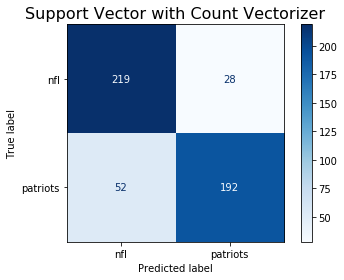

In [170]:
# Print the parameters and accuracy metrics of the best model
grid_best(grid_svccv, X_cv_train, X_cv_test, y_cv_train, y_cv_test, 'Support Vector with Count Vectorizer')

# 5.2 Support Vector - TF-IDF Vectorized

In [115]:
# Instantiate grid search with pipeline of max absolute scaler and logistic regression
grid_svctf = GridSearchCV(pipe_svc,
                        params_svc,
                        verbose = True,
                        cv = 5
                        )

# Fit the grid search to the training data
grid_svctf.fit(X_tf_train, y_tf_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 13.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('maxabs', MaxAbsScaler(copy=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'svc__C': array([1.000000e-04, 2.500075e+00, 5

Best model's cross-validation score: 0.81361
Best model's parameters:
              {'svc__C': 5.00005, 'svc__gamma': 'scale'}
          
Best model's accuracy scores:
              Training data: 0.99116
              Testing data: 0.83707
          


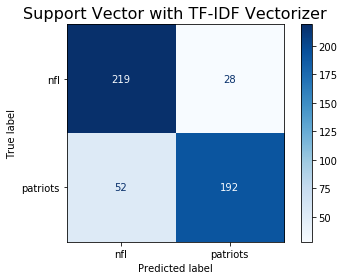

In [171]:
# Print the parameters and accuracy metrics of the best model
grid_best(grid_svctf, X_cv_train, X_cv_test, y_cv_train, y_cv_test, 'Support Vector with TF-IDF Vectorizer')

# 5.3  Support Vector - Summary

Despite the significant loss of interpretability, the SVC model proved notably less accurate than the prior two methods. This could attributable to the high degree of noise in this dataset. While SVMs deal well with high dimensionality, it has no mechanisms for filtering out unuseful data similar to random forests.

# 6.1 Additional Visualizations 

In [129]:
# Create dictionary of models with cleaned description
models_list = {grid_lrcv: 'Logistic Regression - CV',
               grid_lrtf: 'Logistic Regression - TF-IDF',
               grid_rfcv: 'Random Forest - CV',
               grid_rftf: 'Random Forest - TF-IDF',
               grid_svccv: 'Support Vector - CV',
               grid_svctf: 'Support Vector - TF-IDF'}


# Create dictionary of cross-validation scores
models_crossval = {name: round(model.best_score_,3) for model, name in models_list.items()}

In [128]:
{name: round(model.best_score_,3) for model, name in models_list.items()}

{'Logistic Regression - CV': 0.877,
 'Logistic Regression - TF-IDF': 0.878,
 'Random Forest - CV': 0.917,
 'Random Forest - TF-IDF': 0.917,
 'Support Vector - CV': 0.814,
 'Support Vector - TF-IDF': 0.814}

''

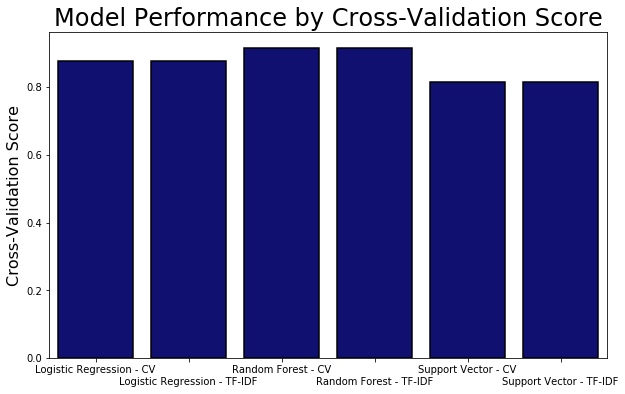

In [157]:
# Chart model performance

# Instantiate figure and set size
plt.figure(figsize=(10,6))

# Input data and define characteristics
ax = sns.barplot(x = list(models_crossval.keys()),
                 y = list(models_crossval.values()), 
                 color = 'navy',
                 linewidth = 1.5,
                 edgecolor = 'black')

# Create offset for x ticks
# Approach taken from
# https://www.thetopsites.net/article/51898101.shtml
newxticklabels = [l if not i%2 else '\n'+l for i,l in enumerate(list(models_crossval.keys()))]
plt.xticks([0,1,2,3,4,5], labels = newxticklabels)

# Set title, y label, and layout
plt.title('Model Performance by Cross-Validation Score', fontsize = 24)
plt.ylabel('Cross-Validation Score', fontsize = 16)
plt.tight_layout

plt.savefig('./charts/model_scores.png')
;

In [180]:
# Create an empty dataframe for the top 25 words by model
df_top25 = pd.DataFrame()

# Add a column for each model
df_top25['Logistic Regression - CV'] = top25_lrcv.index
df_top25['Logistic Regression - TF-IDF'] = top25_lrtf.index
df_top25['Random Forest - CV'] = top25_rfcv.index
df_top25['Random Forest - TF-IDF'] = top25_rftf.index

# Display dataframe
df_top25[['Logistic Regression - CV', 'Random Forest - CV']]

,Logistic Regression - CV,Random Forest - CV
0,patriots,link_i.redd.it
1,comms_num,comms_num
2,cam,patriots
3,highlight,post_score
4,nfl,cam
5,newton,link_twitter.com
6,stidham,nfl
7,england,newton
8,edelman,highlight
9,hightower,posting_hour_utc
